# Variable Elimination

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.thenounproject.com/png/542457-200.png" width="300px" height="300px" />


In the fourth homework you will review the Variable Elimination algorithm that we saw in class. You will have the opportunity to code your own Variable Elimination algorithm and you will use it to make inference on a given network.

If further questions arise, please use the slack channel, or write me to esjimenezro@iteso.mx.


<p style="text-align:right;"> Imagen recuperada de: https://static.thenounproject.com/png/542457-200.png.</p>

___

# 1. Code your own VE algorithm

Recall that the VE algorithm can be described as:

1. The first step is to reduce all factors in $\bar{\Phi}$ acording to the given evidence, if any.

2. For each non-query variable $Z$:
   - Determine the set of factors that involve $Z$:

     $$\Phi' = \left\{\phi_i \in \Phi : Z  \in \mathrm{scope}[\phi_i]\right\}$$

   - Compute:

     $$\psi = \prod_{\phi_i \in \Phi'} \phi_i$$
   
   - Compute:

     $$\tau = \sum_Z \psi$$
   
   - Overwrite:
   
     $$\Phi := \left(\Phi\setminus \Phi'\right) \cup \{\tau\}$$

3. Multiply all the remaining factors.

Based on this description you should define the following function:
   - **variable_elimination:** - This function takes as inputs:
     - The set of factors $\bar{\Phi}$ that model the problem.
     - The variables that won't be eliminated Y (query variables).
     - The evidence (E=e).
     - The elimination order.
     
     With these inputs, the function should return the inferred probability $P(Y|E=e)$. 

In [2]:
from pgmpy.factors.discrete import DiscreteFactor

In [ ]:
def variable_elimination(factors, query_variables, evidence=None, elimination_order=None):
    """
    This function takes as inputs:
     - The set of factors $\bar{\Phi}$ that model the problem.
     - The variables that won't be eliminated Y (query variables).
     - The evidence (E=e).
     - The elimination order.
     
    And returns the inferred probability P(Y|E=e).
    
    :param list[DiscreteFactor] factors: List of factors that model the problem.
    :param list[str] query_variables: Query variables.
    :param dict{str: int} evidence: Evidence in the form of a dictionary. For example evidence={'D': 2, 'E':0}
                                    means that D=d² and E=e⁰.
    :param list[str] elimination_order: Specification of the order in which the variables will be eliminated.
    :return: DiscreteFactor corresponding the inferred probability.
    """
    # --------------------------------------------- Parameter check ---------------------------------------------
    if not isinstance(factors, list) and not factors:
        raise ValueError(f"The parameter factors: {factors} must be a nonempty list of DiscreteFactor objects.")
    if not isinstance(query_variables, list) and not query_variables:
        raise ValueError(f"The parameter query_variables: {query_variables} must be a nonempty list of str objects.")
    if evidence is not None and (not isinstance(evidence, dict) and not evidence):
        raise ValueError(f"The parameter evidence: {evidence} must be a nonempty dict.")
    if elimination_order is not None and (not isinstance(elimination_order, list) and not elimination_order):
        raise ValueError(f"The parameter elimination_order: {elimination_order} must be a nonempty list of str objects.")
    # --------------------------------------------- End parameter check -----------------------------------------
    
    # Initial parameters
    # Number of factors
    m = len(factors)
    # Get variables
    variables = []
    for i in range(m):
        variables.append(factors[i].variables)
    variables = list(set(variables))
    # Number of variables
    n = len(variables)
    # Evidence variables
    evidence_variables = list(evidence.keys())
    
    # 1. If evidence is not None, we must reduce all the factors according to the evidence
    if evidence is not None:
        # For each factor
        for i in range(m):
            # Find intersection of variables between evidence and factor scope
            intersection = set(evidence_variables).intersection(set(factor(i).variables))
            # If intersection is not empty, we must reduce this factor
            if intersection:
                ev = {var: evidence[var] for var in intersection if var in evidence}
                factor(i) = factor(i).reduce(ev.items(), inplace=False)
                
    # Variables to eliminate
    variables_to_eliminate = set(variables).difference(set(query_variables))
    if evidence is not None:
        variables_to_eliminate = variables_to_eliminate.difference(set(evidence_variables))
    variables_to_eliminate = list(variables_to_eliminate)
    
    # If elimination_order is not None, we must check if the variables in elimination_order are right.
    # If the variables in elimination_order are right, then they should be set as variables_to_eliminate.
    if elimination_order is not None:
        if not set(elimination_order).difference(set(variables_to_eliminate)):
            raise ValueError(f"The parameter elimination_order: {elimination_order} does not contain the right variables.")
        else:
            variables_to_eliminate = elimination_order
        
    # 2. Eliminate Var-Z
    factors_update = factors.copy()
    for var in variables_to_eliminate:
        # ---------------------------- Your code goes here! ----------------------------------
        # Determine the set of factors that involve var
        
        # Compute the product of these factors
        
        # Marginalize var
        
        # Overwrite factors_update
        
        # ------------------------------------------------------------------------------------
        
    # 3. Multiply the remaining factors
    # ---------------------------- Your code goes here! ----------------------------------
        
    # ------------------------------------------------------------------------------------

Use the example used in class and the `VariableElimination` algorithm of `pgmpy` to check the correctness of your algorithm. 

# 2. Perform inference over the student example

For the student example, perform the following inferences using the VE algorithm provided by `pgmpy`.

**1. Causal reasoning**

$$P(r^1)$$

$$P(r^1 | i^0)$$

$$P(r^1 | i^0, d^0)$$

**2. Evidential reasoning**

$$P(d^1)$$

$$P(d^1 | c^0)$$

$$P(i^1)$$

$$P(i^1 | c^0)$$

**3. Intercausal reasoning**

$$P(i^1)$$

$$P(i^1 | c^0)$$

$$P(i^1 | c^0, d^1)$$

In [12]:
from IPython.display import Image

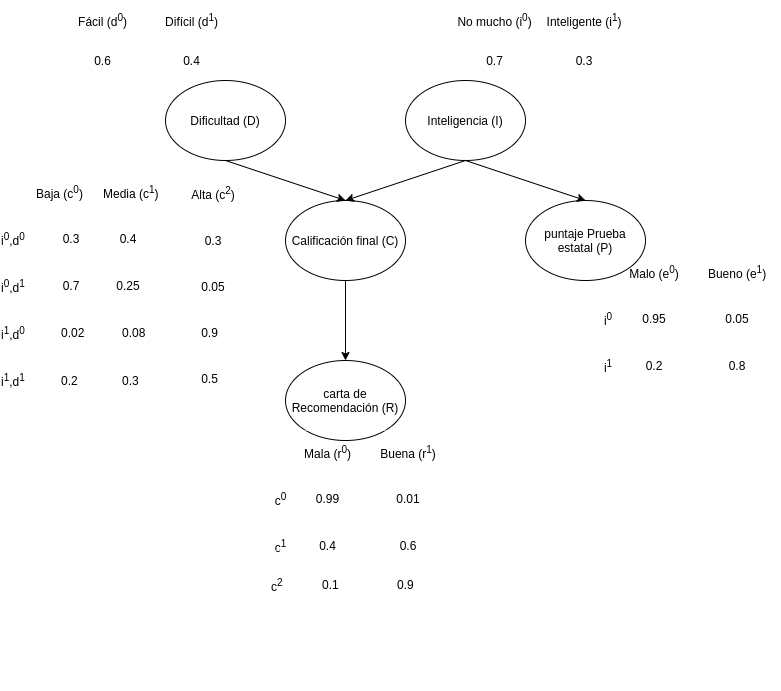

In [13]:
Image(filename='figures/Student1.png')

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>